In [61]:
# Necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

sns.set(style="whitegrid")

In [62]:
# Loads the dataset
url = 'kc_house_data.csv'
df = pd.read_csv(url)

# Displays the first 5 rows
print("Dataset Head:")
display(df.head())

# Gets information about the columns and data types
print("\nDataset Info:")
df.info()

Dataset Head:


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  floa

In [63]:
# Selects the relevant columns
columns_to_use = ['price', 'sqft_living', 'yr_built']
df_clean = df[columns_to_use].copy()

# 1. Handle Missing Values
print(f"Missing values before cleaning:\n{df_clean.isnull().sum()}\n")

# For this assignment, we'll drop any rows that have missing values in our key columns
df_clean = df_clean.dropna(subset=columns_to_use)

print(f"Missing values after dropping NA:\n{df_clean.isnull().sum()}\n")

Missing values before cleaning:
price          0
sqft_living    0
yr_built       0
dtype: int64

Missing values after dropping NA:
price          0
sqft_living    0
yr_built       0
dtype: int64



In [64]:
# 2. Addresses Obvious Outliers

price_q01 = df_clean['price'].quantile(0.01)
price_q99 = df_clean['price'].quantile(0.99)
sqft_q01 = df_clean['sqft_living'].quantile(0.01)
sqft_q99 = df_clean['sqft_living'].quantile(0.99)

df_clean = df_clean[
    (df_clean['price'] >= price_q01) & 
    (df_clean['price'] <= price_q99) &
    (df_clean['sqft_living'] >= sqft_q01) & 
    (df_clean['sqft_living'] <= sqft_q99)
]

print(f"Shape of dataframe after removing outliers: {df_clean.shape}")

Shape of dataframe after removing outliers: (20880, 3)


In [65]:
# 1. Select the primary feature

# 2. Create a new, meaningful feature
# The data was collected from 2014-2015. I'm using 2015 as the "current year".
df_clean['house_age'] = 2015 - df_clean['yr_built']

# Display the new feature
print("Dataframe with new 'house_age' feature:")
display(df_clean.head())

Dataframe with new 'house_age' feature:


,price,sqft_living,yr_built,house_age
0,221900.0,1180,1955,60
1,538000.0,2570,1951,64
2,180000.0,770,1933,82
3,604000.0,1960,1965,50
4,510000.0,1680,1987,28


In [66]:
# 1. Define our features (X) and target (y)
# We use [['sqft_living']] to keep X as a 2D DataFrame
X = df_clean[['sqft_living']]
y = df_clean['price']

# 2. Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 16704 samples
Testing set size: 4176 samples


In [67]:
# 3. Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

print("Model training complete.")
print(f"Model Intercept (b0): {model.intercept_}")
print(f"Model Coefficient for sqft_living (b1): {model.coef_[0]}")

Model training complete.
Model Intercept (b0): 63095.56271186541
Model Coefficient for sqft_living (b1): 221.628945988123


In [68]:
# 1. Makes predictions on the test set
y_pred = model.predict(X_test)

# 2. Calculates evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("--- Model Evaluation ---")
print(f"Mean Squared Error (MSE): {mse:,.2f}")
print(f"R-squared (R2): {r2:.4f}")

print(f"\nThis model explains approximately {r2*100:.2f}% of the variance in house prices.")

--- Model Evaluation ---
Mean Squared Error (MSE): 45,327,322,979.62
R-squared (R2): 0.4275

This model explains approximately 42.75% of the variance in house prices.


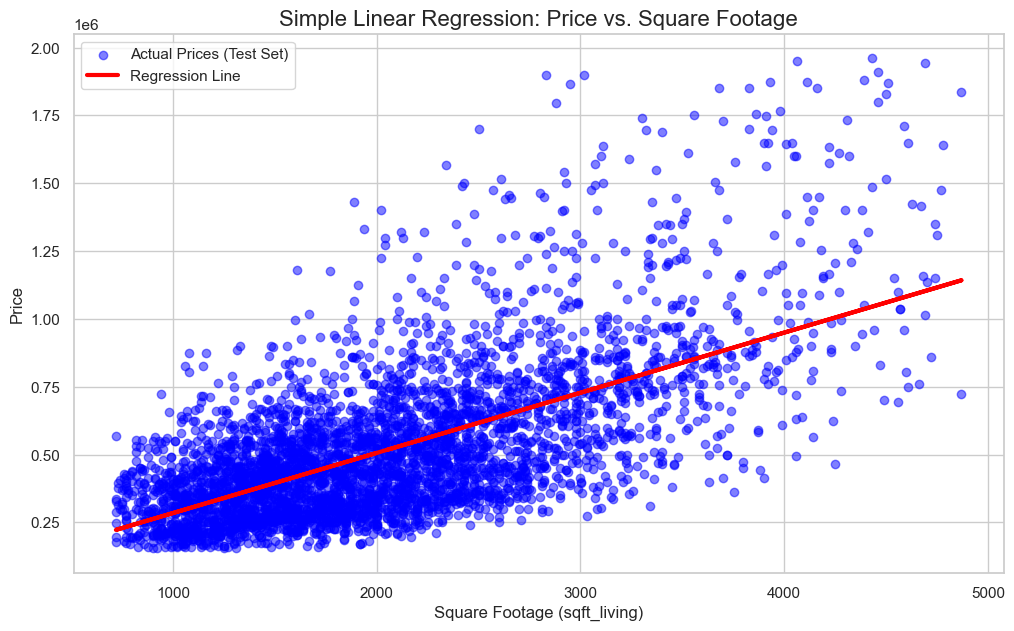

In [69]:
# 3. Create the scatter plot with the regression line
plt.figure(figsize=(12, 7))

# Scatter plot of the actual test data
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual Prices (Test Set)')

# Plot the regression line (predictions)
plt.plot(X_test, y_pred, color='red', linewidth=3, label='Regression Line')

plt.title('Simple Linear Regression: Price vs. Square Footage', fontsize=16)
plt.xlabel('Square Footage (sqft_living)', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend()
plt.show()

In [70]:
# Test Case 1: Predicts price for a 1,800 sq ft house
custom_sqft_1 = 1800

# Creates a mini-DataFrame
custom_data_1 = pd.DataFrame([[custom_sqft_1]], columns=['sqft_living'])
predicted_price_1 = model.predict(custom_data_1)

print(f"Predicted price for {custom_sqft_1} sq ft: ${predicted_price_1[0]:,.2f}")

# Test Case 2: Predicts price for a 3,000 sq ft house
custom_sqft_2 = 3000

# Creates a mini-DataFrame
custom_data_2 = pd.DataFrame([[custom_sqft_2]], columns=['sqft_living'])
predicted_price_2 = model.predict(custom_data_2)

print(f"Predicted price for {custom_sqft_2} sq ft: ${predicted_price_2[0]:,.2f}")

Predicted price for 1800 sq ft: $462,027.67
Predicted price for 3000 sq ft: $727,982.40
